# Classificação de textos do Twitter com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import spacy
spacy.__version__

'2.2.3'

In [2]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

# Etapa 2: Carregamento das bases de dados

- Link Kaggle: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

## Base de treinamento

- Negative label: 0
- Positive label: 1

In [3]:
base_treinamento = pd.read_csv('../data/Train50.csv', delimiter=';')

In [4]:
base_treinamento.shape

(50000, 5)

In [5]:
base_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [6]:
base_treinamento.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


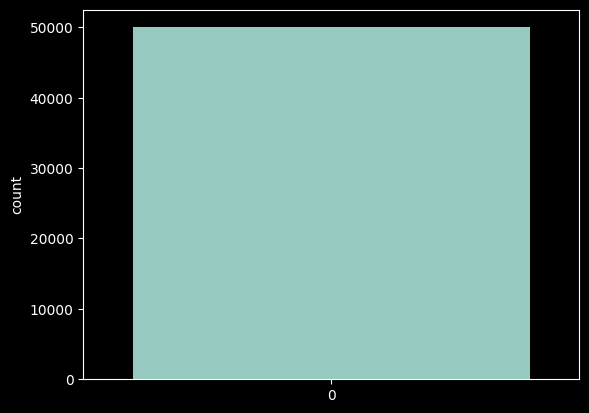

In [7]:
sns.countplot(base_treinamento['sentiment'], label = 'Contagem');

In [8]:
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [9]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


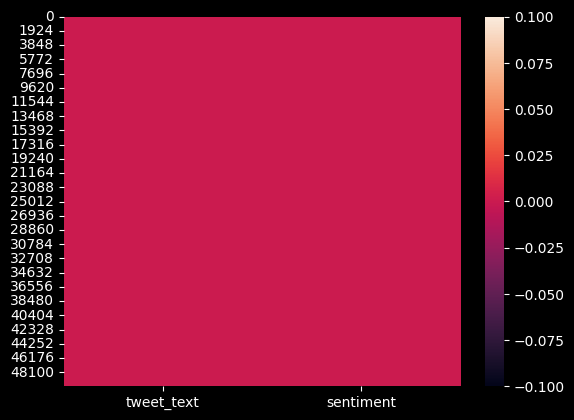

In [10]:
sns.heatmap(pd.isnull(base_treinamento));

## Base de teste

In [11]:
base_teste = pd.read_csv('../data/Test.csv', delimiter=';')

In [12]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [13]:
base_teste.shape

(5000, 5)

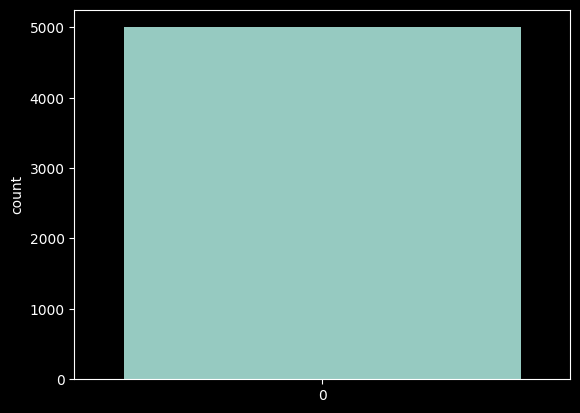

In [14]:
sns.countplot(base_teste['sentiment'], label='Contagem');

In [15]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [16]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


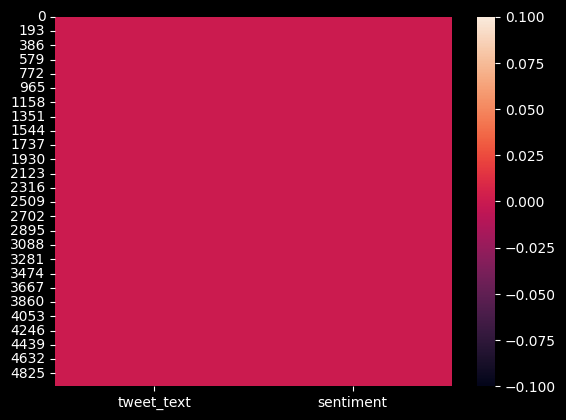

In [17]:
sns.heatmap(pd.isnull(base_teste));

# Etapa 3: Função para pré-processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [18]:
base_treinamento = base_treinamento.sample(n=5000)

In [19]:
spacy.prefer_gpu()
pln = spacy.load("pt_core_news_sm")
pln

In [20]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [21]:
print(stop_words)

{'dizer', 'ele', 'foi', 'para', 'nós', 'atrás', 'mês', 'nesse', 'ter', 'maiorias', 'fazes', 'conhecida', 'oitava', 'dez', 'quando', 'deverá', 'demais', 'neste', 'longe', 'ambas', 'entre', 'oitavo', 'sois', 'quinta', 'és', 'minhas', 'te', 'for', 'todo', 'após', 'novos', 'comprida', 'alguns', 'irá', 'muitos', 'fora', 'inicio', 'ou', 'estava', 'dezassete', 'porque', 'aqueles', 'agora', 'pelas', 'último', 'aquele', 'perto', 'tem', 'usar', 'vossa', 'faz', 'aquela', 'tipo', 'obrigada', 'uma', 'vossos', 'uns', 'dão', 'ademais', 'teus', 'esteve', 'apoia', 'naquele', 'tiveram', 'estes', 'pois', 'novas', 'dezasseis', 'custa', 'posso', 'umas', 'vai', 'foste', 'ali', 'parte', 'momento', 'estiveram', 'aquelas', 'era', 'me', 'nem', 'área', 'dá', 'deste', 'fazer', 'teve', 'mais', 'que', 'conselho', 'dizem', 'tentar', 'numa', 'cuja', 'cujo', 'desde', 'primeiro', 'dos', 'desse', 'num', 'sim', 'sou', 'vos', 'bom', 'bastante', 'com', 'suas', 'tua', 'vem', 'seria', 'estou', 'sétimo', 'vocês', 'segunda', '

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def preprocessamento(texto):
  # Letras minúsculas
  texto = texto.lower()

  # Nome do usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

  # URLs
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Espaços em branco
  texto = re.sub(r" +", ' ', texto)

  # Emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  # Lematização
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)

  # Stop words e pontuações
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [24]:
texto_teste = '@behin_d_curtain :D Para :( mim, http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
resultado = preprocessamento(texto_teste)
resultado

'  emocaopositiva parir emocaonegativa mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [25]:
base_treinamento.head(10)

,tweet_text,sentiment
31320,Antes de levarem a gente pros campos de concen...,0
23682,"@luqizilla Parabéns ai cachorrão de diamante, ...",1
11060,@VargasZanchetta dinheiro mais bem gasto em um...,1
11116,@lovatolorde que poc burra como q eu vou votar...,1
15616,Aproveitem o dia 3 de outubro numa quarta para...,1
31097,Quando eu lembro que agora só tem pomeras no d...,0
9126,A bermuda que eu mais uso manchada de água san...,1
9848,@queenbriny Boa Noite :P,1
49517,to triste e com saudade :( meu instinto eh ir ...,0
32912,queria só um limão :((,0


In [26]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

In [27]:
base_treinamento.head(10)

,tweet_text,sentiment
31320,antar levar o gente pros campo concentração vi...,0
23682,parabém ai cachorrão diamante felicidade pdl...,1
11060,dinheiro gastar emocaopositiva comprar budwe...,1
11116,poc burro comer q votar o bolsonaro emocaopo...,1
15616,aproveitar o dia outubro parir forçar o campan...,1
31097,lembrar pomeras o domingo emocaonegativa,0
9126,o bermuda manchar água sanitário emocaopositiva,1
9848,noite :p,1
49517,to triste e saudade emocaonegativa instinto eh...,0
32912,querer limão emocaonegativa,0


In [28]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

In [29]:
base_teste.head(10)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1
5,preciso emocaopositiva,1
6,acaso adorar beijo e abraço hahahahaha bue f...,1
7,solteiro s emocaopositiva,1
8,lindeza cortador kit mário coleção bia cravol ...,1
9,claro emocaopositiva,1


### Tratamento da classe

In [30]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [31]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])

In [32]:
len(base_dados_treinamento_final)

5000

In [33]:
base_dados_treinamento_final[10:15]

[['querer morar emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['  yaaas apelidar happy vírus poxa emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  antonieta tá o vibe odisseia ... tá chato escolher emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  foder emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['ave maria saudade amor emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}]]

In [34]:
base_dados_treinamento_final[45000:45005]

[]

# Etapa 5: Criação do classificador

In [35]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [36]:
modelo.begin_training()
for epoca in range(20):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 1.4545368060225883e-05}
{'textcat': 5.279939990776583e-08}
{'textcat': 3.23153887538119e-08}
{'textcat': 3.1457299237702685e-08}


In [37]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [38]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.45453681e-05, 1.45453681e-05, 1.45453681e-05, 1.45453681e-05,
       1.45453681e-05, 1.45453681e-05, 1.45453681e-05, 1.45453681e-05,
       1.45453681e-05, 1.45453681e-05, 1.30176731e-06, 1.30176731e-06,
       1.30176731e-06, 1.30176731e-06, 1.30176731e-06, 1.30176731e-06,
       1.30176731e-06, 1.30176731e-06, 1.30176731e-06, 1.30176731e-06,
       1.98967727e-07, 1.98967727e-07, 1.98967727e-07, 1.98967727e-07,
       1.98967727e-07, 1.98967727e-07, 1.98967727e-07, 1.98967727e-07,
       1.98967727e-07, 1.98967727e-07, 9.49485487e-08, 9.49485487e-08,
       9.49485487e-08, 9.49485487e-08, 9.49485487e-08, 9.49485487e-08,
       9.49485487e-08, 9.49485487e-08, 9.49485487e-08, 9.49485487e-08,
       6.73050169e-08, 6.73050169e-08, 6.73050169e-08, 6.73050169e-08,
       6.73050169e-08, 6.73050169e-08, 6.73050169e-08, 6.73050169e-08,
       6.73050169e-08, 6.73050169e-08, 5.27993999e-08, 5.27993999e-08,
       5.27993999e-08, 5.27993999e-08, 5.27993999e-08, 5.27993999e-08,
      

Text(0, 0.5, 'Erro')

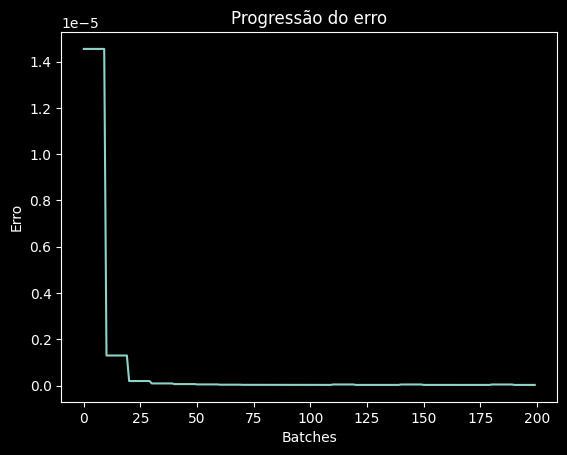

In [39]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [40]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [41]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

## Texto positivo

In [42]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [43]:
previsao = modelo_carregado(texto_positivo)
previsao

  ficar feliz q recíproco emocaopositiva

In [44]:
previsao.cats

{'POSITIVO': 0.999552309513092, 'NEGATIVO': 0.00011948264727834612}

In [45]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gostar'

In [46]:
modelo_carregado(texto_positivo).cats

{'POSITIVO': 0.2621064782142639, 'NEGATIVO': 0.797693133354187}

## Texto negativo

In [47]:
base_teste['tweet_text'][4000]

'tô triste filmar mulan o mushu emocaonegativa'

In [48]:
texto_negativo = base_teste['tweet_text'][4000]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 0.004464374855160713, 'NEGATIVO': 0.9982393980026245}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [49]:
previsoes = []
for texto in base_treinamento['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [50]:
previsoes

[{'POSITIVO': 0.006914909463375807, 'NEGATIVO': 0.9995328187942505},
 {'POSITIVO': 0.9998034834861755, 'NEGATIVO': 0.00017324059444945306},
 {'POSITIVO': 0.9984935522079468, 'NEGATIVO': 0.0012980414321646094},
 {'POSITIVO': 0.9997180104255676, 'NEGATIVO': 0.00013756382395513356},
 {'POSITIVO': 0.9997491240501404, 'NEGATIVO': 0.00013716408284381032},
 {'POSITIVO': 0.0010048502590507269, 'NEGATIVO': 0.9994845390319824},
 {'POSITIVO': 0.9997441172599792, 'NEGATIVO': 0.0002469273458700627},
 {'POSITIVO': 0.9987195730209351, 'NEGATIVO': 0.00024243546067737043},
 {'POSITIVO': 0.0017077348893508315, 'NEGATIVO': 0.9992189407348633},
 {'POSITIVO': 0.0037010465748608112, 'NEGATIVO': 0.9985973238945007},
 {'POSITIVO': 0.0011658868752419949, 'NEGATIVO': 0.9991288781166077},
 {'POSITIVO': 0.002568864729255438, 'NEGATIVO': 0.9994685053825378},
 {'POSITIVO': 0.005667201709002256, 'NEGATIVO': 0.9988194108009338},
 {'POSITIVO': 0.00045391591265797615, 'NEGATIVO': 0.9995717406272888},
 {'POSITIVO': 0.00

In [51]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [52]:
previsoes_final

array([0, 1, 1, ..., 0, 0, 1])

In [53]:
respostas_reais = base_treinamento['sentiment'].values
respostas_reais

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9996

In [55]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2488,    2],
       [   0, 2510]], dtype=int64)

<Axes: >

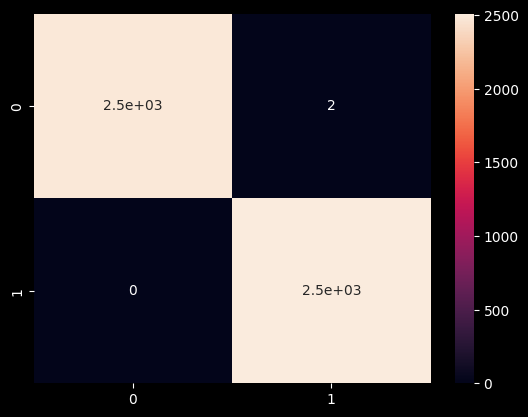

In [56]:
sns.heatmap(cm, annot=True)

## Avaliação na base de teste

In [57]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [58]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [59]:
respostas_reais = base_teste['sentiment'].values

In [60]:
accuracy_score(respostas_reais, previsoes_final)

0.9946

In [61]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2494,    6],
       [  21, 2479]], dtype=int64)

<Axes: >

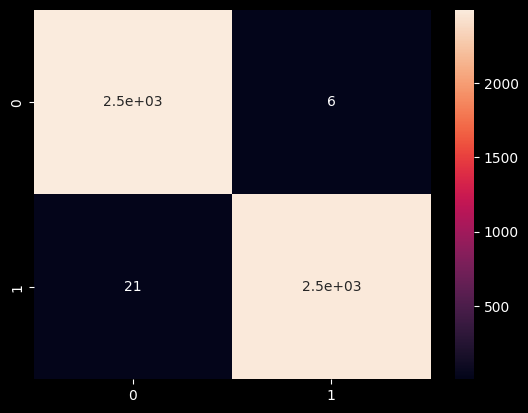

In [62]:
sns.heatmap(cm, annot=True)